Advanced: Detaching from Run Compute
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

Now we'll add datasets

In [3]:
b.add_dataset('lc', times=np.linspace(0,20,501))

<ParameterSet: 43 parameters | contexts: dataset, compute, figure, constraint>

Run Compute
----------------

Here we just pass detach=True to any run_compute call.  We'll immediately be returned to the prompt instead of waiting for the results to complete.

In [4]:
b.run_compute(detach=True, model='mymodel')

Wed, 11 Dec 2019 11:55 BUNDLE       WARNING detach support is EXPERIMENTAL


<Parameter: detached_job=unknown | keys: description, value, server_status, location, status_method, retrieve_method, uniqueid, advanced>

If we then try to access the model, we see that there is instead a single parameter that is a placeholder - this parameter stores information on how to check the progress of the run_compute job and how to load the resulting model once it's complete

In [5]:
b['mymodel']

<Parameter: detached_job=unknown | keys: description, value, server_status, location, status_method, retrieve_method, uniqueid, advanced>

Re-attaching to a Job
------------------------------

We can check on the job's status

In [6]:
print(b['mymodel'].status)

unknown


If we want, we can even save the Bundle and load it later to retrieve the results.  In this case where the job is being run in a different Python thread but on the same machine, you cannot, however, exit Python or restart your machine.  

When detaching and running on a server (coming soon), you will then be able to exit your Python session or even open the Bundle on a different machine.

In [7]:
b.save('test_detach.bundle')

'test_detach.bundle'

In [8]:
b = phoebe.Bundle.open('test_detach.bundle')

In [9]:
print(b['mymodel'].status)

unknown


And at any point we can choose to "re-attach".  If the job isn't yet complete, we'll be in a wait loop until it is.  Once the job is complete, the new model will be loaded and accessible.

In [10]:
b['mymodel'].attach()

<ParameterSet: 5 parameters | contexts: model, figure>

In [11]:
b['mymodel']

<ParameterSet: 5 parameters | contexts: model, figure>

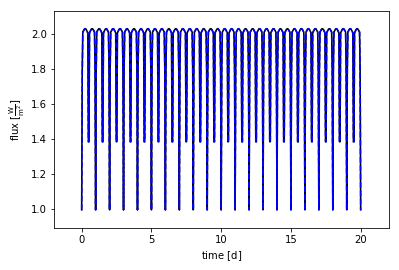

In [13]:
axs, artists = b['mymodel'].plot(show=True)